In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ALLerrordataset.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [3]:
df=df.drop(labels=["fragment","manifest","hit","@version","popname"],axis=1)
df=df.drop(labels=["timefirstbyte","contentlength","timetoserv","maxage","sid"],axis=1)
df=df.drop(labels=["path","uid"],axis=1)
df=df.drop(labels=["contentpackage","devicemodel","devicebrand", "assetnumber"],axis=1)
df=df.drop(labels=["protocol","osfamily", "coordinates"],axis=1)

In [4]:
df_livetv = df[df['host'] == 7]

In [5]:
df_livetv=df_livetv.drop(labels=["cachecontrol"],axis=1)
df_livetv=df_livetv.drop(labels=["uamajor"],axis=1)
df_livetv=df_livetv.drop(labels=["devicefamily","host","method", "cachename"],axis=1)

In [6]:
df_jii = df_livetv['@timestamp']

In [7]:
from datetime import datetime
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
gh=[]
for i in df_jii:
    date = datetime.strptime(i, format_data)
    gh.append(date.hour)

In [8]:
df_livetv['hour'] = gh

In [9]:
km = df_livetv.copy()

In [10]:
km1 = df_livetv.copy()

In [11]:
km1=km1.drop(labels=["@timestamp", "hour"],axis=1)

In [12]:
km=km.drop(labels=["@timestamp"],axis=1)

In [13]:
km['uafamily']=km['uafamily'].fillna(km['uafamily'].mode()[0])
km['contenttype']=km['contenttype'].fillna(km['contenttype'].mode()[0])
km['livechannel']=km['livechannel'].fillna(km['livechannel'].mode()[0])

In [14]:
km1['uafamily']=km1['uafamily'].fillna(km1['uafamily'].mode()[0])
km1['contenttype']=km1['contenttype'].fillna(km1['contenttype'].mode()[0])
km1['livechannel']=km1['livechannel'].fillna(km1['livechannel'].mode()[0])

In [15]:
km1.drop_duplicates(subset=None, keep='first', inplace=True)
km.drop_duplicates(subset=None, keep='first', inplace=True)

In [16]:
import gower
from sklearn_extra.cluster import KMedoids
gower_mat = gower.gower_matrix(km)
gower_mat_1 = gower.gower_matrix(km1)

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/2365406367.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "single", metric="minkowski"))


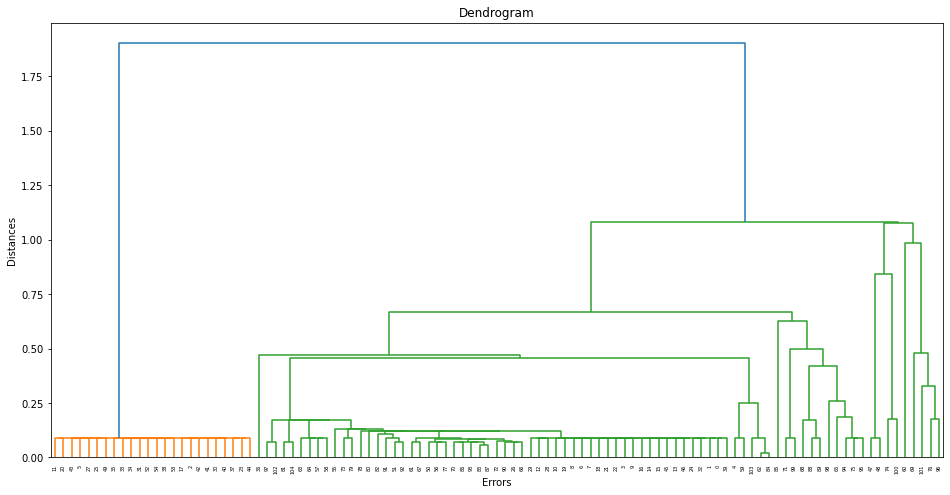

In [55]:
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "single", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramsimplehost7.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/156038450.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "complete", metric="minkowski"))


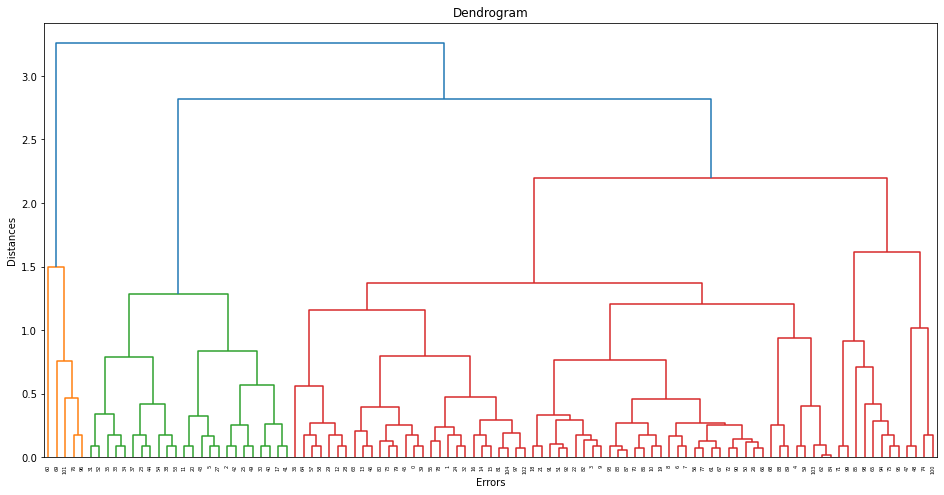

In [56]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "complete", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramcompletehost7.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/3195961179.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "average", metric="minkowski"))


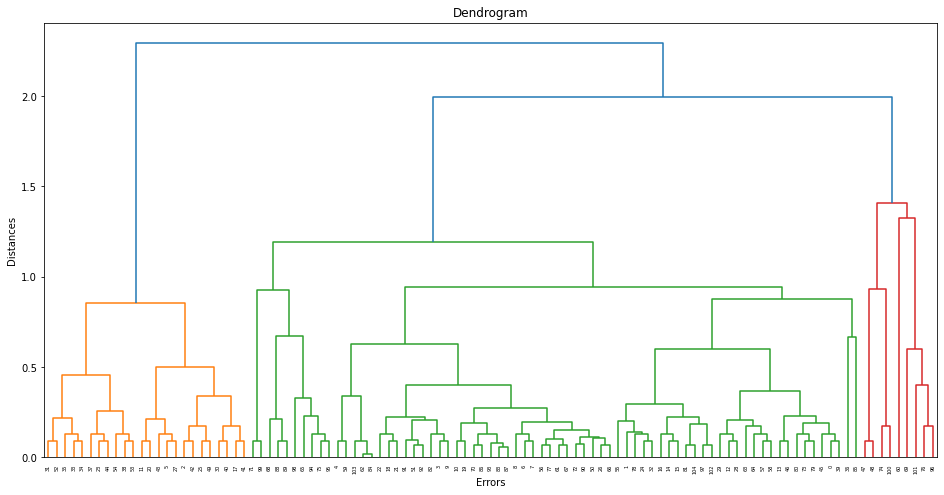

In [20]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat, method  = "average", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramhost7.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters = 2, affinity='minkowski', linkage='average')

In [18]:
ac3 = AgglomerativeClustering(n_clusters = 3, affinity='minkowski', linkage='average')

In [19]:
ac4 = AgglomerativeClustering(n_clusters = 4, affinity='minkowski', linkage='average')

In [20]:
ac5 = AgglomerativeClustering(n_clusters = 5, affinity='minkowski', linkage='average')

In [21]:
ac6 = AgglomerativeClustering(n_clusters = 6, affinity='minkowski', linkage='average')

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: s

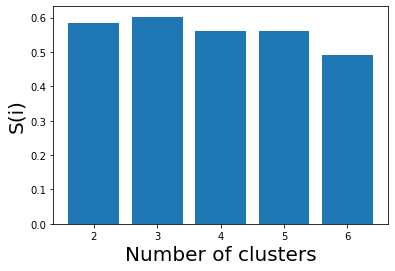

In [27]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(gower_mat, ac2.fit_predict(gower_mat)))
silhouette_scores.append(
		silhouette_score(gower_mat, ac3.fit_predict(gower_mat)))
silhouette_scores.append(
		silhouette_score(gower_mat, ac4.fit_predict(gower_mat)))
silhouette_scores.append(
		silhouette_score(gower_mat, ac5.fit_predict(gower_mat)))
silhouette_scores.append(
		silhouette_score(gower_mat, ac6.fit_predict(gower_mat)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.savefig('SilhoutteHAC7.png', bbox_inches='tight')
plt.show()


In [22]:
n = ac3.fit_predict(gower_mat);

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [27]:
from sklearn import metrics
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(gower_mat, labels))

124.42247848902383
130.83611300992047
96.84255704994662
75.54820290972688
83.80516804328056


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: s

In [29]:
n

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2], dtype=int64)

In [65]:
from sklearn.metrics import davies_bouldin_score
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat)
    labels = result.labels_
    print(davies_bouldin_score(gower_mat, labels))

0.5935793038116471
0.5492356779654394
0.7165921593791618
0.6998716478824882
0.6575494371629893


In [30]:
km['cluster'] = n;

In [31]:
km.head()

,statuscode,contenttype,uafamily,livechannel,hour,cluster
70,400,text/html; charset=utf-8,12.0,60.0,7,2
75,400,text/html; charset=utf-8,12.0,60.0,8,2
79,412,text/html,12.0,60.0,16,1
82,400,text/html; charset=utf-8,12.0,60.0,17,2
85,404,text/html; charset=utf-8,12.0,68.0,18,2


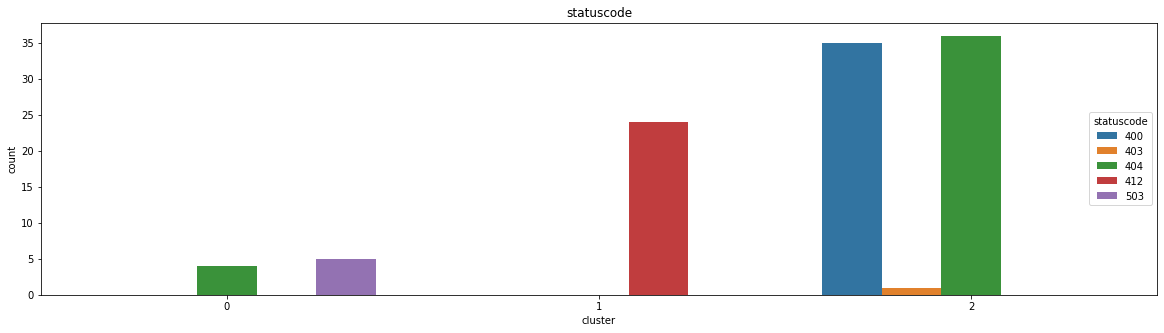

In [32]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="statuscode", data = km)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('StatuscodeHAC7.png', dpi=300, bbox_inches='tight')
plt.show()


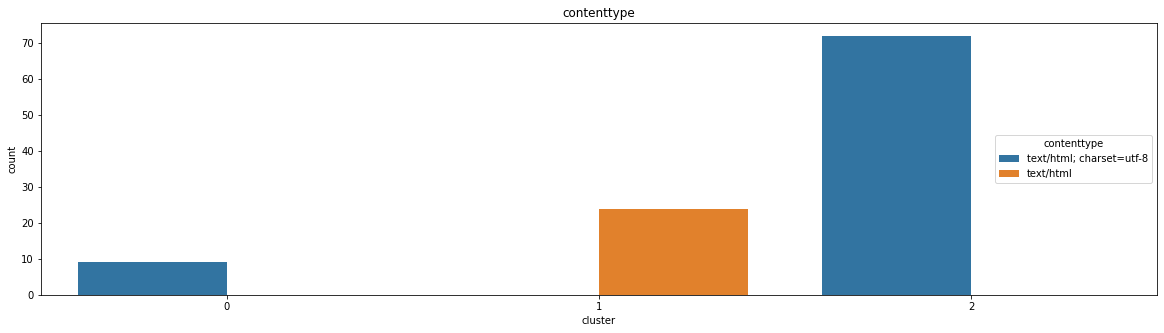

In [33]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="contenttype", data = km)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.savefig('contenttypeHAC7.png', bbox_inches='tight')
plt.show()


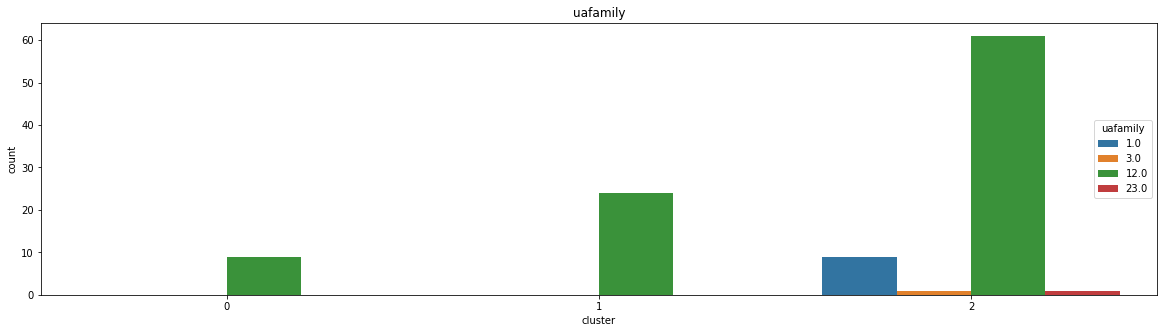

In [34]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="uafamily", data = km)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.savefig('uafamilyHAC7.png', bbox_inches='tight')
plt.show()


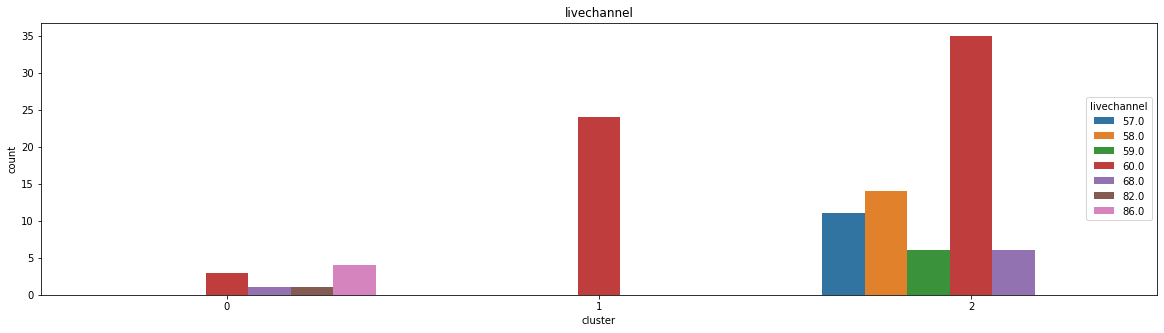

In [35]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="livechannel", data = km)
ax.set_title('livechannel')
ax.legend(loc='right', title="livechannel")
plt.savefig('livechannelHAC7.png', bbox_inches='tight')
plt.show()


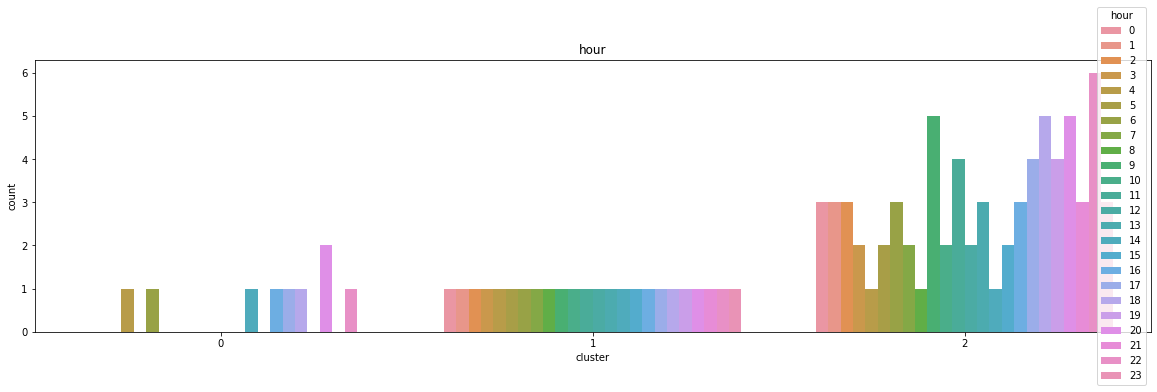

In [36]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="hour", data = km)
ax.set_title('hour')
ax.legend(loc='right', title="hour")
plt.savefig('hourHAC7.png', bbox_inches='tight')
plt.show()

In [29]:
df_filecaching = df[df['host'] == 13]

In [30]:
df_filecaching=df_filecaching.drop(labels=["livechannel"],axis=1)
df_filecaching=df_filecaching.drop(labels=["cachecontrol", "host"],axis=1)

In [31]:
df_filecaching=df_filecaching.drop(labels=["uamajor","devicefamily","cachename"],axis=1)

In [32]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   @timestamp   11658 non-null  object 
 4   method       11658 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 546.5+ KB


In [33]:
df_filecaching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11658 entries, 2 to 286976
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   11658 non-null  int64  
 1   contenttype  11658 non-null  object 
 2   uafamily     11658 non-null  float64
 3   @timestamp   11658 non-null  object 
 4   method       11658 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 546.5+ KB


In [34]:
df_jiiiii = df_filecaching['@timestamp']

In [35]:
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
yh=[]
for i in df_jiiiii:
    date = datetime.strptime(i, format_data)
    yh.append(date.hour)

In [36]:
df_filecaching['hour'] = yh

In [37]:
llp = df_filecaching.copy()

In [38]:
llp1 = df_filecaching.copy()

In [39]:
llp1=llp1.drop(labels=["@timestamp", "hour"],axis=1)

In [40]:
llp=llp.drop(labels=["@timestamp"],axis=1)

In [41]:
llp1.drop_duplicates(subset=None, keep='first', inplace=True)
llp.drop_duplicates(subset=None, keep='first', inplace=True)

In [42]:
llp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2 to 98061
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   7 non-null      int64  
 1   contenttype  7 non-null      object 
 2   uafamily     7 non-null      float64
 3   method       7 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 280.0+ bytes


In [43]:
llp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 2 to 202563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   58 non-null     int64  
 1   contenttype  58 non-null     object 
 2   uafamily     58 non-null     float64
 3   method       58 non-null     object 
 4   hour         58 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB


In [44]:
gower_mat_2 = gower.gower_matrix(llp)
gower_mat_3 = gower.gower_matrix(llp1)

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/399172705.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "single", metric="minkowski"))


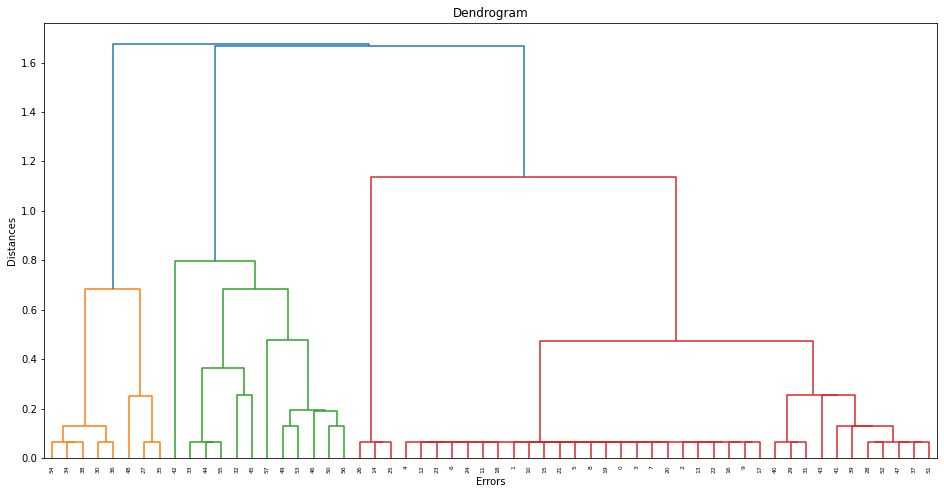

In [57]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "single", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramsimplehost13.png', bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/817287427.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "complete", metric="minkowski"))


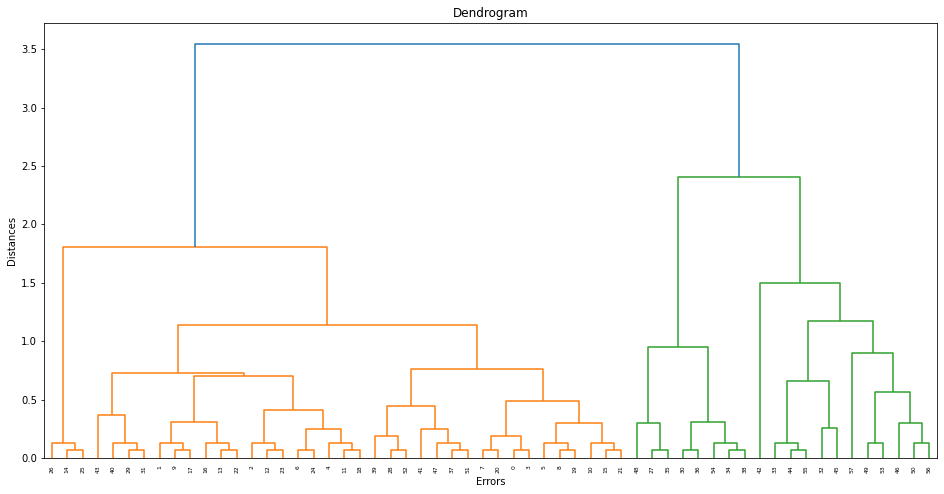

In [58]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "complete", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramcompletehost13.png', bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/706751009.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "average", metric="minkowski"))


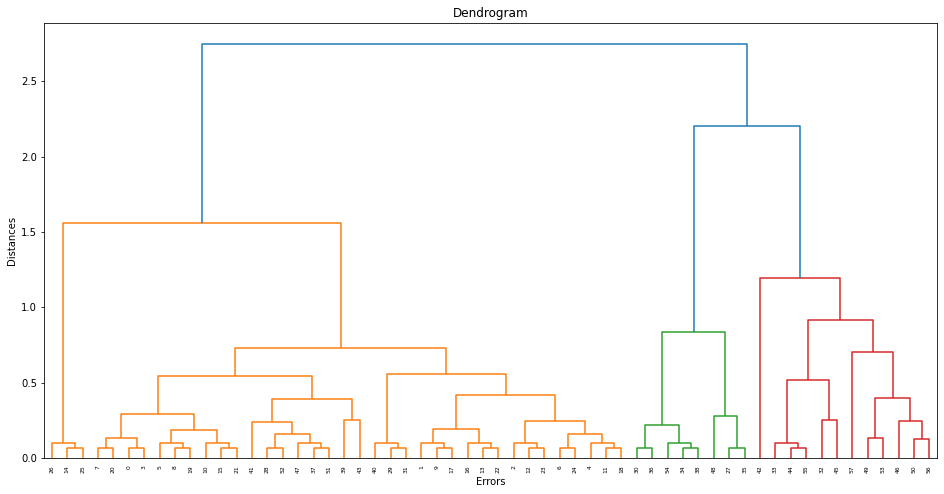

In [60]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_2, method  = "average", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramhost13.png', bbox_inches='tight')
plt.show()


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: s

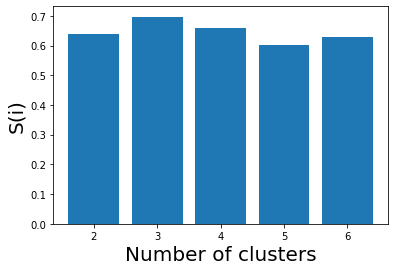

In [61]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(gower_mat_2, ac2.fit_predict(gower_mat_2)))
silhouette_scores.append(
		silhouette_score(gower_mat_2, ac3.fit_predict(gower_mat_2)))
silhouette_scores.append(
		silhouette_score(gower_mat_2, ac4.fit_predict(gower_mat_2)))
silhouette_scores.append(
		silhouette_score(gower_mat_2, ac5.fit_predict(gower_mat_2)))
silhouette_scores.append(
		silhouette_score(gower_mat_2, ac6.fit_predict(gower_mat_2)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.savefig('SilhoutteHAC13.png', bbox_inches='tight')
plt.show()


In [66]:
from sklearn import metrics
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat_2)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(gower_mat_2, labels))

114.3565729269528
161.94420656442517
152.40453484343624
133.17904177156112
128.39130092772461


In [67]:
from sklearn.metrics import davies_bouldin_score
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat_2)
    labels = result.labels_
    print(davies_bouldin_score(gower_mat_2, labels))

0.6683149817792425
0.40115429671211755
0.40733049590818227
0.42522395162830096
0.45467770659786366


In [62]:
kk = ac3.fit_predict(gower_mat_2);

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [63]:
llp['cluster'] = kk;

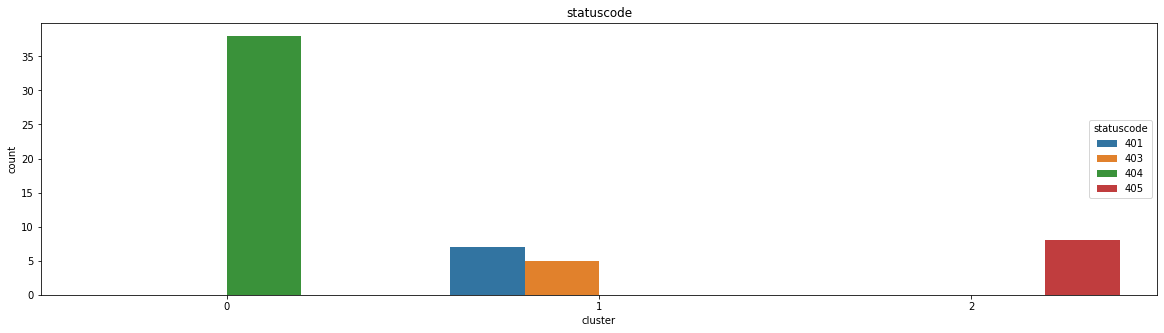

In [64]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="statuscode", data = llp)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('StatuscodeHAC13.png', bbox_inches='tight')
plt.show()


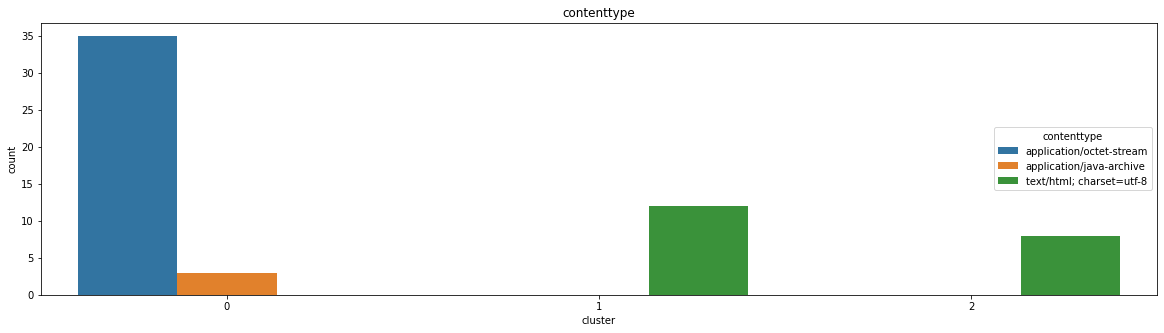

In [65]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="contenttype", data = llp)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.savefig('contenttypeHAC13.png', bbox_inches='tight')
plt.show()


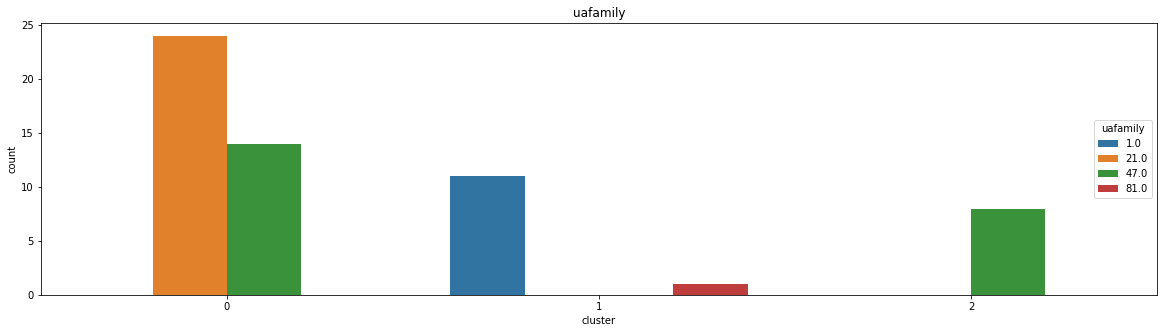

In [66]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="uafamily", data = llp)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.savefig('uafamilyHAC13.png', bbox_inches='tight')
plt.show()


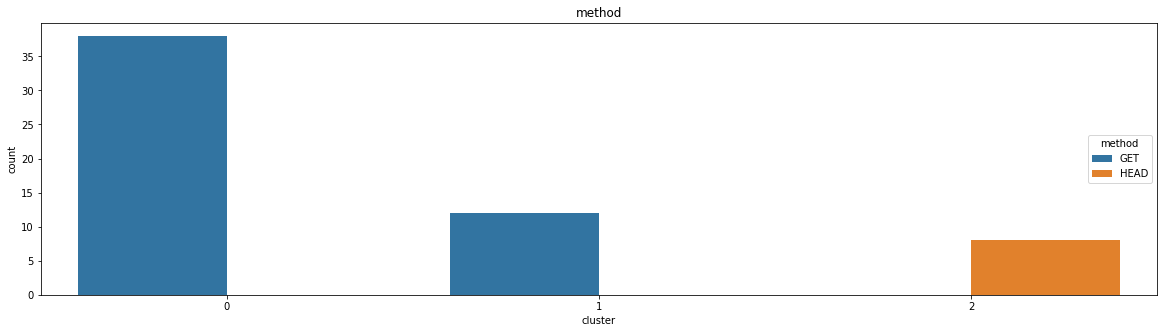

In [67]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="method", data = llp)
ax.set_title('method')
ax.legend(loc='right', title="method")
plt.savefig('methodHAC13.png', bbox_inches='tight')
plt.show()


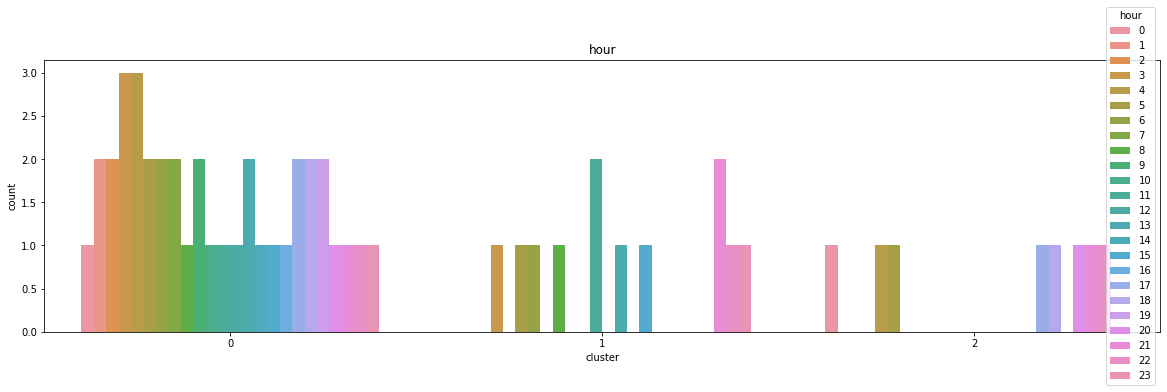

In [68]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="hour", data = llp)
ax.set_title('hour')
ax.legend(loc='right', title="hour")
plt.savefig('hourHAC13.png', bbox_inches='tight')
plt.show()


In [47]:
df_website = df[df['host'] == 3]

In [48]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   statuscode    1660 non-null   int64  
 1   contenttype   1660 non-null   object 
 2   cachecontrol  1660 non-null   object 
 3   uamajor       1377 non-null   float64
 4   uafamily      1660 non-null   float64
 5   devicefamily  1660 non-null   float64
 6   @timestamp    1660 non-null   object 
 7   livechannel   0 non-null      float64
 8   host          1660 non-null   float64
 9   method        1660 non-null   object 
 10  cachename     1660 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 155.6+ KB


In [49]:
df_website=df_website.drop(labels=["cachecontrol","devicefamily","livechannel", "host", "method", "cachename"],axis=1)

In [50]:
df_website.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 76 to 286903
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   1660 non-null   int64  
 1   contenttype  1660 non-null   object 
 2   uamajor      1377 non-null   float64
 3   uafamily     1660 non-null   float64
 4   @timestamp   1660 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 77.8+ KB


In [51]:
df_jiiiiiiii = df_website['@timestamp']

In [52]:
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
oh=[]
for i in df_jiiiiiiii:
    date = datetime.strptime(i, format_data)
    oh.append(date.hour)

In [53]:
df_website['hour'] = oh

In [54]:
bbj = df_website.copy()

In [55]:
bbj1 = df_website.copy()

In [56]:
bbj1=bbj1.drop(labels=["@timestamp", "hour"],axis=1)

In [57]:
bbj=bbj.drop(labels=["@timestamp"],axis=1)

In [58]:
bbj1.drop_duplicates(subset=None, keep='first', inplace=True)
bbj.drop_duplicates(subset=None, keep='first', inplace=True)

In [59]:
bbj1['uamajor']=bbj1['uamajor'].fillna(bbj1['uamajor'].mode()[0])
bbj['uamajor']=bbj['uamajor'].fillna(bbj['uamajor'].mode()[0])

In [60]:
bbj1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 76 to 277045
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   65 non-null     int64  
 1   contenttype  65 non-null     object 
 2   uamajor      65 non-null     float64
 3   uafamily     65 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [61]:
bbj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 76 to 284303
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   statuscode   352 non-null    int64  
 1   contenttype  352 non-null    object 
 2   uamajor      352 non-null    float64
 3   uafamily     352 non-null    float64
 4   hour         352 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.5+ KB


In [62]:
gower_mat_4 = gower.gower_matrix(bbj)
gower_mat_5 = gower.gower_matrix(bbj1)

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/1919008665.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "single", metric="minkowski"))


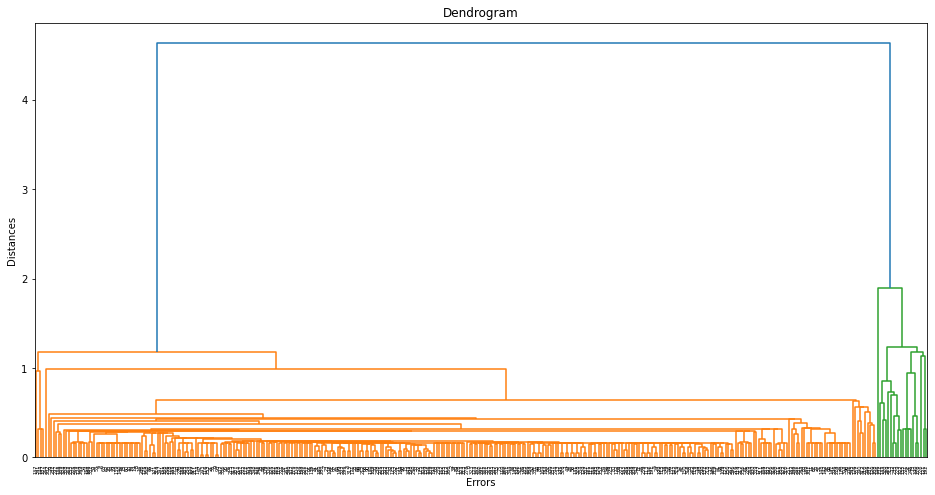

In [85]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "single", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramsimplehost3.png', bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/2451737072.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "complete", metric="minkowski"))


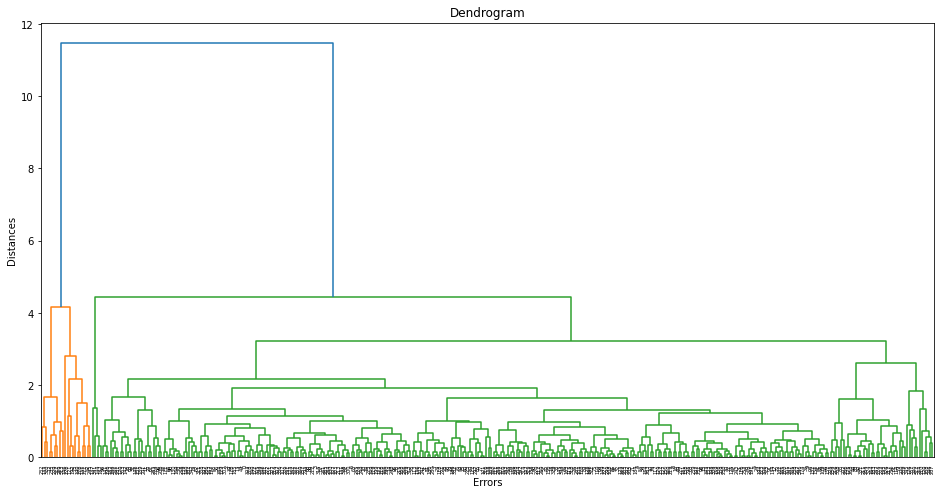

In [86]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "complete", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramcompletehost3.png', bbox_inches='tight')
plt.show()

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_30880/2804721925.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "average", metric="minkowski"))


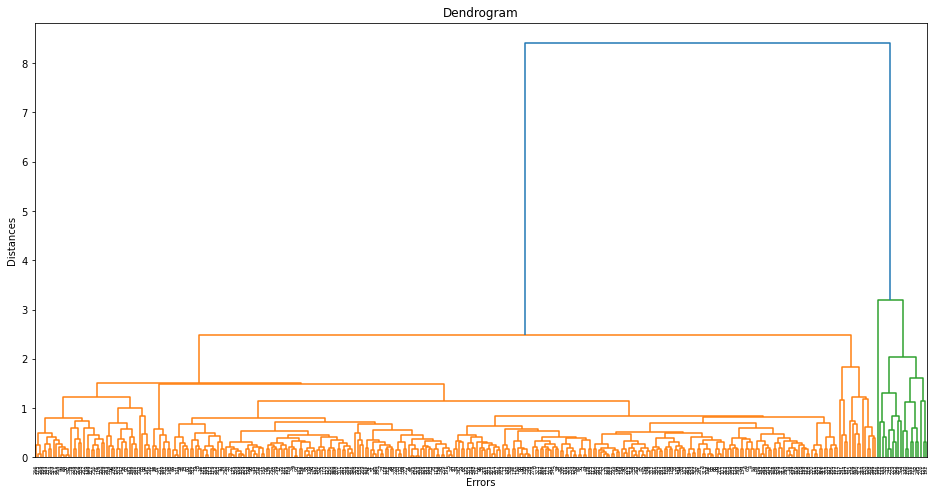

In [87]:
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(gower_mat_4, method  = "average", metric="minkowski"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Errors')
plt.ylabel('Distances')
plt.savefig('Dendrogramhost3.png', bbox_inches='tight')
plt.show()


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: s

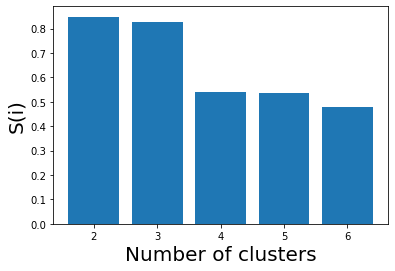

In [88]:
k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
		silhouette_score(gower_mat_4, ac2.fit_predict(gower_mat_4)))
silhouette_scores.append(
		silhouette_score(gower_mat_4, ac3.fit_predict(gower_mat_4)))
silhouette_scores.append(
		silhouette_score(gower_mat_4, ac4.fit_predict(gower_mat_4)))
silhouette_scores.append(
		silhouette_score(gower_mat_4, ac5.fit_predict(gower_mat_4)))
silhouette_scores.append(
		silhouette_score(gower_mat_4, ac6.fit_predict(gower_mat_4)))

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.savefig('SilhoutteHAC3.png', bbox_inches='tight')
plt.show()


In [63]:
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat_4)
    labels = result.labels_
    print(metrics.calinski_harabasz_score(gower_mat_4, labels))

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


1326.6799709572924
683.5925991668779
609.4183258710319
486.47192023415994
403.3214885612735


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [64]:
for i in range(2, 7):
    result = AgglomerativeClustering(n_clusters = i, affinity='minkowski', linkage='average').fit(gower_mat_4)
    labels = result.labels_
    print(davies_bouldin_score(gower_mat_4, labels))

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


0.25666129172110785
0.33608829223525105
0.5784624816659656
0.7374259188735495
0.72940143501053


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [89]:
mmm = ac2.fit_predict(gower_mat_4);

C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [90]:
bbj['cluster'] = mmm;

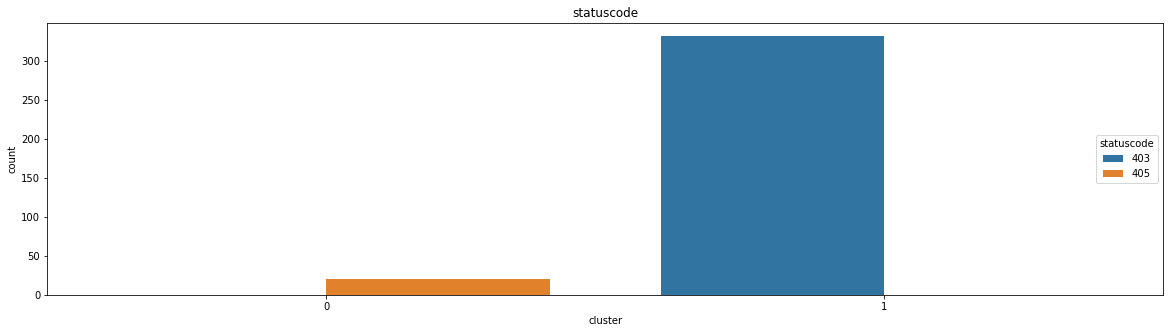

In [91]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="statuscode", data = bbj)
ax.set_title('statuscode')
ax.legend(loc='right', title="statuscode")
plt.savefig('StatuscodeHAC3.png', bbox_inches='tight')
plt.show()


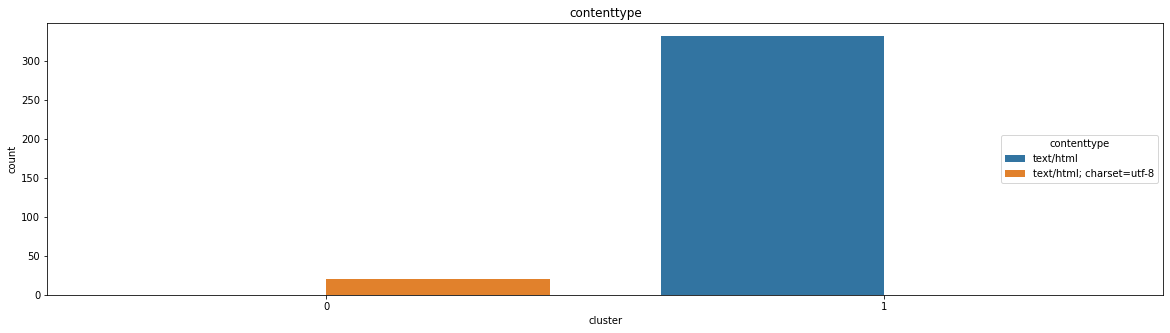

In [92]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="contenttype", data = bbj)
ax.set_title('contenttype')
ax.legend(loc='right', title="contenttype")
plt.savefig('contenttypeHAC3.png', bbox_inches='tight')
plt.show()


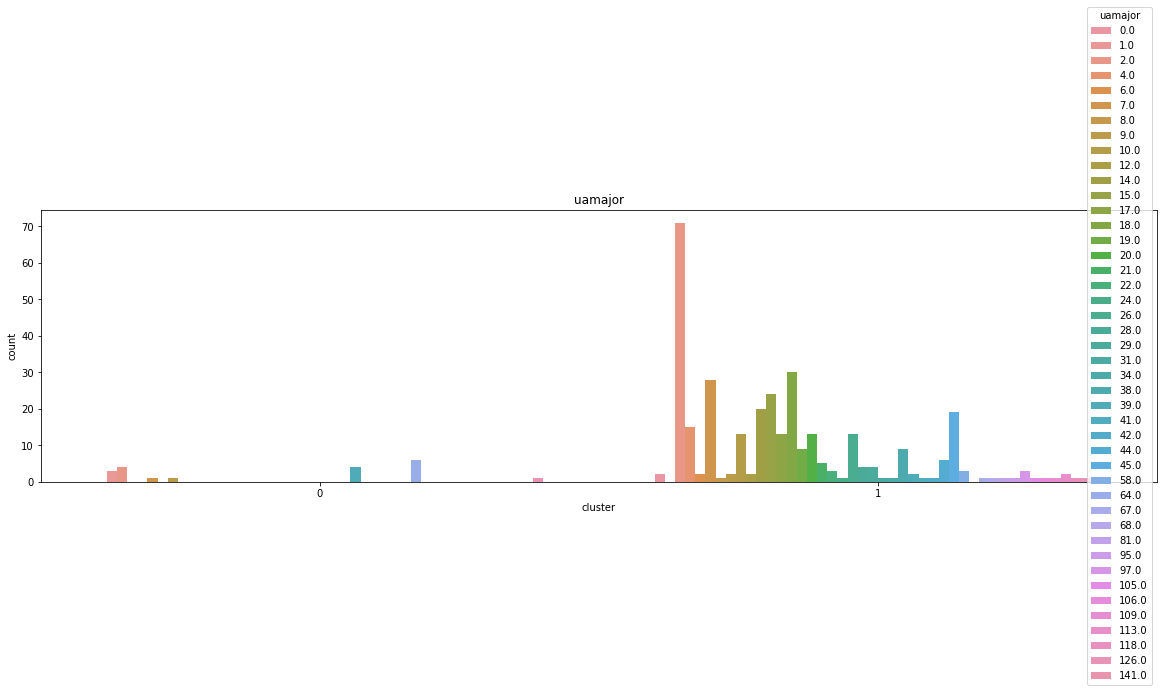

In [93]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="uamajor", data = bbj)
ax.set_title('uamajor')
ax.legend(loc='right', title="uamajor")
plt.savefig('uamajorHAC3.png', bbox_inches='tight')
plt.show()


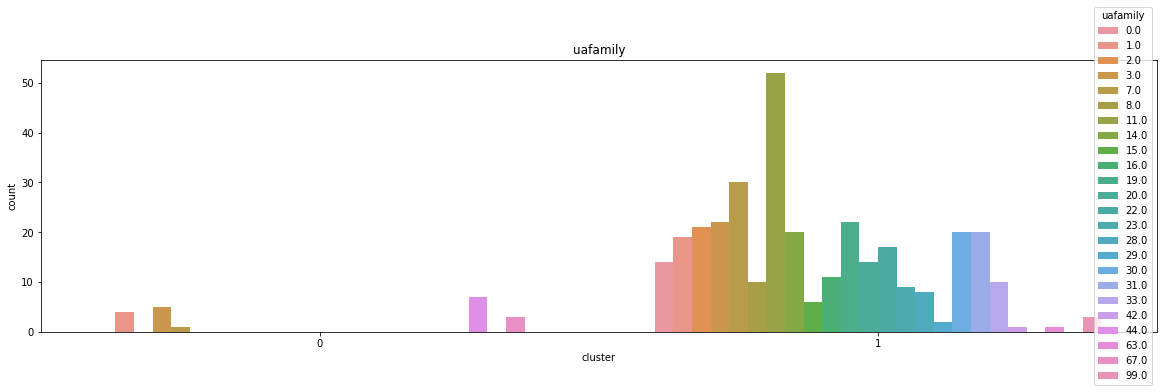

In [94]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="uafamily", data = bbj)
ax.set_title('uafamily')
ax.legend(loc='right', title="uafamily")
plt.savefig('uafamilyHAC3.png', bbox_inches='tight')
plt.show()


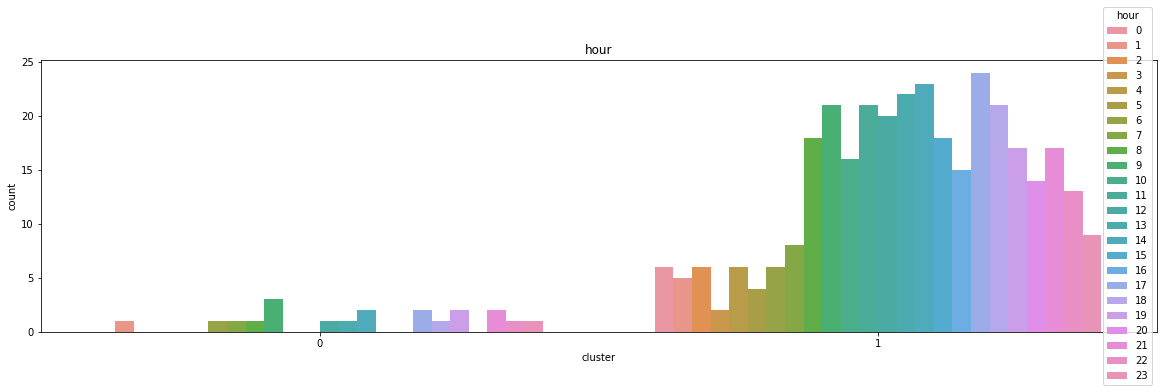

In [95]:
plt.subplots(figsize = (20,5))
ax = sns.countplot(x='cluster',hue="hour", data = bbj)
ax.set_title('hour')
ax.legend(loc='right', title="hour")
plt.savefig('hourHAC3.png', bbox_inches='tight')
plt.show()
